# 차원 축소
- 노이즈 제거
- 주어진 데이터의 정보 손실 최소화하면서 줄이는 것이 핵심
- 특징 추출 = 데이터에서 두드러진 면 추출
- <주성분 분석(Principal Component Analysis:PCA)> - 비지도학습 차원축소
- <선형 판별 분석(Linear Discriminant Analysis:LDA)> - 지도학습 차원축소

### 차원의 저주(curse of dimensionality)
- 데이터의 차원이 커질수록 해당 차원을 표현하기 위해 필요한 데이터가 기하급수적으로 많아짐을 의미
- 즉, 학습데이터의 차원이 클수록 차원의 저주 때문에 해당 공간을 적절히 표현하지 못하여 오버피팅될 확률 높아짐
- 차원축소로 해결

## 주성분 분석 (Principal Component Analysis: PCA)
- 여러 피처가 통계적으로 서로 상관관계가 없도록 변환시키는 방법
- 분산이 큰 고유 벡터에 기존 데이터 투영해 새롭게 구한 데이터에 대한 벡터를 <주성분 벡터>라고 부름
 

- 주성분 벡터 = 서로 직교 = 벡터 간 사잇각 90도 = 내적 0 = 공분산 0 --> 상관관계 X

- 고유벡터: 각 흩어짐에 대한 방향 파악
- 고유값: 어느 정도 흩어져 있는지 그 크기
 - (공분산 행렬 p차원일 때) 고유값 p개 더하면 데이터 셋의 전체 변동성이 됨

In [2]:
# 와인 데이터 이용해 주성분 분석 통해 차원 축소
from sklearn import datasets
raw_wine = datasets.load_wine()

X = raw_wine.data
y = raw_wine.target

from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1)

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [3]:
# PCA 통한 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 줄이고 싶은 차원 수 설정 (2차원으로 줄이는 상황)
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std) # PCA 모형 바탕으로 X_tn_std 변형
X_te_pca = pca.transform(X_te_std) # X_te_std 변형

# 데이터 차원 축소 확인
print(X_tn_std.shape) # 13차원의 데이터 133개
print(X_tn_pca.shape) # 2차원의 데이터 133개

(133, 13)
(133, 2)


In [4]:
# 고유값, 고유벡터 확인
print(pca.singular_values_) # 고유값
print(pca.components_) # 고유벡터 (=주성분 벡터)

[24.81797394 18.31760391]
[[-0.10418545  0.25670612  0.01387486  0.23907587 -0.10470229 -0.4007005
  -0.42902734  0.29111343 -0.30307602  0.12127653 -0.31609521 -0.38729685
  -0.26283936]
 [-0.49018724 -0.1691503  -0.30746987  0.04459018 -0.34837302 -0.07966456
  -0.0133774  -0.02498633 -0.0415164  -0.50798383  0.26045807  0.14018631
  -0.39850143]]


In [6]:
# 설명되는 분산
print(pca.explained_variance_) # 각 주성분 벡터가 설명하는 분산
print(pca.explained_variance_ratio_) # 분산의 전체 분산 대비 비율 (첫번째 주성분은 전체 분산의 약 35.9% 설명, 두 번째 주성분은 전체 분산의 19.6% 설명)

[4.66615023 2.54192889]
[0.35623588 0.19406282]


In [9]:
# 차원 축소 데이터 확인
import pandas as pd # 시각화에 유리하기 때문에 데이터프레임 형태로 바꿈
pca_columns = ['pca_comp1', 'pca_comp2']
X_tn_pca_df = pd.DataFrame(X_tn_pca, columns=pca_columns)
X_tn_pca_df['target'] = y_tn
X_tn_pca_df.head(5)

,pca_comp1,pca_comp2,target
0,-2.231848,-0.148603,0
1,-1.364444,0.422617,1
2,-1.918072,-2.014682,0
3,-3.539272,-2.878394,0
4,-3.182320,-2.020041,0


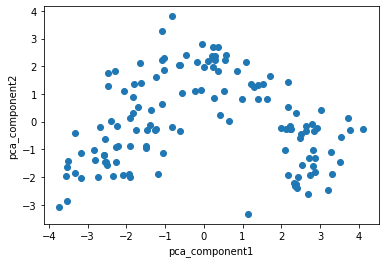

In [10]:
# 라벨 미적용 PCA 데이터 (타겟 X = 각 데이터가 어떤 와인 클래스를 나타내는지 알 수 없음)
import matplotlib.pyplot as plt
plt.scatter(X_tn_pca_df['pca_comp1'],
           X_tn_pca_df['pca_comp2'],
           marker='o') # plot의 형태: o
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

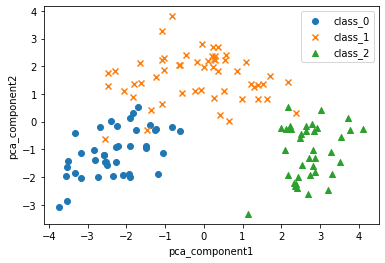

In [13]:
# 라벨 적용 PCA 데이터
df = X_tn_pca_df
# 클래스 별로 데이터 분할
df_0 = df[df['target']==0]
df_1 = df[df['target']==1]
df_2 = df[df['target']==2]
# 클래스 별로 분할된 데이터의 첫 번째 주성분 벡터 추출
X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']
# 두 번째 주성분 벡터 추출
X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']
X_23 = df_2['pca_comp2']
# 타깃 이름 지정 (와인종류)
target_0 = raw_wine.target_names[0]
target_1 = raw_wine.target_names[1]
target_2 = raw_wine.target_names[2]

plt.scatter(X_11, X_21, marker='o', label=target_0)
plt.scatter(X_12, X_22, marker='x', label=target_1)
plt.scatter(X_13, X_23, marker='^', label=target_2)

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

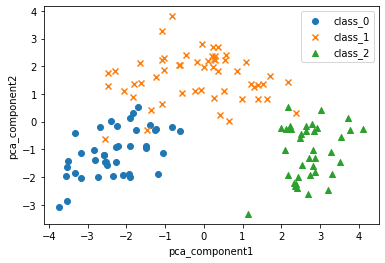

In [14]:
# 동일 코드 반복문 이용
df = X_tn_pca_df
markers = ['o', 'x', '^']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = raw_wine.target_names[i]
    X1 = df_i['pca_comp1']
    X2 = df_i['pca_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)
    
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

In [15]:
# PCA  적용 이전 데이터 학습
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_tn_std, y_tn)
pred_rf = clf_rf.predict(X_te_std)

# PCA 적용 이전 정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9777777777777777


In [21]:
# PCA 적용 후 데이터 학습
clf_rf_pca = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf_pca.fit(X_tn_pca, y_tn)
pred_rf_pca = clf_rf_pca.predict(X_te_pca)

# 정확도 예측
accuracy_pca = accuracy_score(y_te, pred_rf_pca)
print(accuracy_pca)

0.9555555555555556


11차원이나 줄였는데도 정확도는 2% 감소로밖에 이어지지 않았음. 학습 비용을 고려할 때, 차원 축소를 이용하면 학습 비용 대비 정확도 감소는 작기 때문에 효율적이라 볼 수 있음. 실제로 고차원 데이터(high dimensional data)의 경우, 시스템 리소스가 부족해 학습이 어려운 경우 차원 축소로 해결

## 커널PCA
- 기존 PCA를 일반화 => 비선형적으로 수행
- 기존 데이터 고차원으로 매핑 -> 새로운 공간으로 이동한 데이터에 대해 주성분 분석 수행 -> 원래의 공간으로 매핑

In [22]:
from sklearn import datasets
raw_wine = datasets.load_wine()

X = raw_wine.data
y = raw_wine.target

from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1)

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [24]:
# 커널 PCA를 통한 데이터 차원 축소
from sklearn.decomposition import KernelPCA
k_pca = KernelPCA(n_components=2, kernel='poly') # 차원과 커널 설정
k_pca.fit(X_tn_std)
X_tn_kpca = k_pca.transform(X_tn_std)
X_te_kpca = k_pca.transform(X_te_std)

# 차원 축소 전후 데이터 차원 비교
print(X_tn_std.shape)
print(X_tn_kpca.shape)

(133, 13)
(133, 2)


In [25]:
# 고유값 확인
print(k_pca.lambdas_)

[193.89824561 118.0368972 ]


In [26]:
# 고유벡터 확인
print(k_pca.alphas_)

[[ 0.07266242  0.00456251]
 [ 0.0469712  -0.04020348]
 [ 0.08698324  0.07012786]
 [ 0.19996777  0.218482  ]
 [ 0.14558241  0.12759024]
 [-0.0316937  -0.0955557 ]
 [-0.10921606  0.09183472]
 [-0.11306065  0.07491762]
 [ 0.08725253  0.05204947]
 [-0.02421116 -0.09637237]
 [ 0.10518354  0.00629214]
 [ 0.08056162  0.03107663]
 [ 0.03371273 -0.12190244]
 [-0.10603515  0.03252174]
 [ 0.07314539 -0.07636543]
 [-0.00830065 -0.06671645]
 [ 0.08166126  0.0683314 ]
 [-0.12106496  0.08116178]
 [-0.00440492 -0.13286099]
 [-0.098436    0.01206587]
 [ 0.16936111  0.14411655]
 [-0.00112801 -0.10236899]
 [ 0.05046673  0.05090575]
 [ 0.02312764 -0.11672988]
 [ 0.05288299  0.01634404]
 [-0.14390684  0.07755703]
 [-0.1116687   0.10213843]
 [-0.09004075  0.07111502]
 [-0.13169412  0.12006775]
 [-0.06341878 -0.03931811]
 [-0.01177083 -0.10981527]
 [ 0.03619517 -0.01828061]
 [-0.156624    0.11828334]
 [ 0.09838309  0.05224656]
 [-0.03607944 -0.04304917]
 [-0.08718829  0.03003902]
 [ 0.107761    0.08440051]
 

In [31]:
# 커널 PCA 이후 데이터 셋
import pandas as pd
kpca_columns = ['kpca_comp1', 'kpca_comp2']
X_tn_kpca_df = pd.DataFrame(X_tn_kpca, columns=kpca_columns)
X_tn_kpca_df['target'] = y_tn
X_tn_kpca_df.head(5)

,kpca_comp1,kpca_comp2,target
0,1.011805,0.049569,0
1,0.654061,-0.436790,1
2,1.211219,0.761903,0
3,2.784498,2.373693,0
4,2.027196,1.386201,0


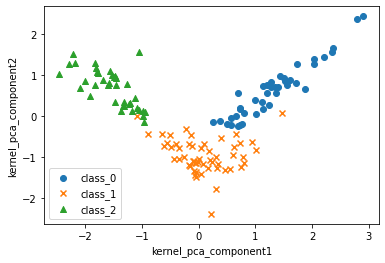

In [32]:
# 커널 PCA 적용 데이터 시각화
import matplotlib.pyplot as plt

df = X_tn_kpca_df
markers = ['o', 'x', '^']

for i, mark in enumerate(markers):
    X_i = df[df['target']==i]
    target_i = raw_wine.target_names[i]
    X1 = X_i['kpca_comp1']
    X2 = X_i['kpca_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)
    
plt.xlabel('kernel_pca_component1')
plt.ylabel('kernel_pca_component2')
plt.legend()
plt.show()

In [34]:
# 데이터 학습 및 예측(랜덤 포레스트)
from sklearn.ensemble import RandomForestClassifier
clf_rf_kpca = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf_kpca.fit(X_tn_kpca, y_tn)
pred_rf_kpca = clf_rf_kpca.predict(X_te_kpca)

In [35]:
# 정확도 평가
accuracy_kpca = accuracy_score(y_te, pred_rf_kpca)
print(accuracy_kpca)

0.9555555555555556


## LDA (Linear Discriminant Analysis, 선형판별분석)
- 데이터 포인트가 속하는 클래스를 구분하는 판별 함수가 선형인 형태
- 지도학습적 접근 방법 통한 차원 축소
- 데이터를 데이터 셋의 기존 공간으로부터 집단 간 분산과 집단 내 분산의 비율을 최대화하는 기존 공간보다 더 작은 차원의 공간으로 원래 데이터 투영시킴으로써 최대한 분리시켜 차원 축소 진행


Steps
1. 집단 간 거리 계산 (집단 간 분산 between-class variance)
> 데이터 셋 전체 평균 - i번째 집단에 속하는 데이터의 평균
2. 각 집단의 평균과 각 데이터 포인트의 거리 계산 (집단 내 분산 within-class variance)
3. 기존 데이터 셋의 공간보다 더 작은 차원의 공간 만듦 (집단 간 분산 최대화하고 집단 내 분산 최소로하는 공간)

PCA는 데이터 셋의 분산이 최대인 직교 성분 축을 찾으려고 하는 반면

LDA는 클래스를 최적으로 구분할 수 있는 특성 부분 공간을 찾으려는 것

In [1]:
# LDA
#데이터 불러오기
from sklearn import datasets
raw_wine = datasets.load_wine()

# 피처/타깃 데이터 지정
X = raw_wine.data
y = raw_wine.target

# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1)

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [3]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis() # 옵션으로 n_components 값 설정 가능 default = min(class수-1, feature수)
lda.fit(X_tn_std, y_tn)
X_tn_lda = lda.transform(X_tn_std)
X_te_lda = lda.transform(X_te_std)

In [4]:
# LDA 전/후 데이터 차원 비교
print(X_tn_std.shape) # 13차원의 데이터 133개
print(X_tn_lda.shape) # 2차원의 데이터 133개로 차원 축소

(133, 13)
(133, 2)


In [5]:
# LDA 상수항, 가중 벡터 확인
print(lda.intercept_) # 상수항은 클래스 개수만큼 나옴
print(lda.coef_) # 가중벡터의 차원은 (클래스 개수)*(피처 개수)

[ -9.49063922  -3.6792656  -10.65310672]
[[ 2.11536841  0.34171834  1.60756274 -2.62777005 -0.02954383 -1.92461007
   5.43612614  0.30142527 -0.66723405 -2.08948728  0.53569108  3.06011656
   5.45318503]
 [-1.18707715 -0.97635273 -1.64104916  1.19614378  0.22114803  0.2969019
   1.13721801  0.4338713   0.33425086 -1.57541361  0.56544507 -0.17730553
  -2.34856045]
 [-0.59547207  1.01875252  0.59754164  1.13544231 -0.28238675  1.65463974
  -7.48134065 -0.94177595  0.24492236  4.49319245 -1.38150969 -3.04974421
  -2.54627163]]


In [6]:
# LDA 적용 후 데이터 셋
import pandas as pd
lda_columns = ['lda_comp1', 'lda_comp2']
X_tn_lda_df = pd.DataFrame(X_tn_lda, columns=lda_columns)
X_tn_lda_df['target'] = y_tn
X_tn_lda_df.head(5)

,lda_comp1,lda_comp2,target
0,2.563293,-0.503212,0
1,0.646015,-2.169761,1
2,3.981901,1.621584,0
3,5.956216,3.878140,0
4,4.047839,2.335699,0


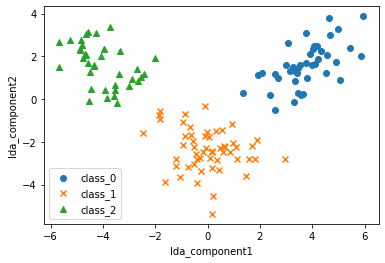

In [7]:
# LDA 시각화
import matplotlib.pyplot as plt
df = X_tn_lda_df
markers=['o', 'x', '^']

for i, mark in enumerate(markers):
    X_i = df[df['target']==i] # i 번째 클래스에 해당하는 데이터 추출
    target_i = raw_wine.target_names[i] # i 번째 타깃 클래스 이름 저장
    X1 = X_i['lda_comp1'] # lda 요소 설정
    X2 = X_i['lda_comp2'] # lda 요소 설정
    plt.scatter(X1, X2, marker=mark, label=target_i) # scatter plot으로 시각화

plt.xlabel('lda_component1')
plt.ylabel('lda_component2')
plt.legend()
plt.show()

In [8]:
# LDA 적용 후 랜덤 포레스트 학습 및 예측
from sklearn.ensemble import RandomForestClassifier
clf_rf_lda = RandomForestClassifier(max_depth=2, random_state=0)

clf_rf_lda.fit(X_tn_lda, y_tn)
pred_rf_lda = clf_rf_lda.predict(X_te_lda)

In [9]:
# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy_lda = accuracy_score(y_te, pred_rf_lda)
print(accuracy_lda)

1.0


## LLE (Locally Linear Embedding)
- 기존 데이터를 자신의 이웃 데이터를 기준으로 재구성. 즉, 해당 데이터 자체보다 주변의 이웃 데이터가 중요
- 재구성 에러 최소화 목적
- 데이터 주변의 이웃 관계 유지하면서 새로운 공간에 투영하는 것이 중요

In [10]:
from sklearn import datasets
raw_wine = datasets.load_wine()

X = raw_wine.data
y = raw_wine.target

from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1)

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [11]:
# LLE 적합
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding()
lle.fit(X_tn_std, y_tn)
X_tn_lle = lle.transform(X_tn_std)
X_te_lle = lle.transform(X_te_std)

In [12]:
# LLE 적용 전후 데이터 차원 비교
print(X_tn_std.shape)
print(X_tn_lle.shape)

(133, 13)
(133, 2)


In [13]:
# LLE 임베딩 벡터 확인
print(lle.embedding_)

[[ 0.10370077  0.03797149]
 [ 0.07222626  0.00764776]
 [ 0.11291288  0.05930921]
 [ 0.11560401  0.06205209]
 [ 0.11854756  0.06719633]
 [-0.02664269 -0.13181186]
 [-0.10501921  0.07537654]
 [-0.10326081  0.07047313]
 [ 0.10811266  0.04689056]
 [-0.04377827 -0.09418701]
 [ 0.0712414   0.01801874]
 [ 0.13033709  0.08810276]
 [ 0.02991311 -0.04069974]
 [-0.07898669  0.01497572]
 [ 0.03473125 -0.05744147]
 [ 0.01943026 -0.04529514]
 [ 0.11959649  0.07007802]
 [-0.10317351  0.07114343]
 [-0.02752016 -0.14962908]
 [-0.1164511   0.10200801]
 [ 0.10508563  0.04186687]
 [-0.01462819 -0.16313682]
 [ 0.06810266 -0.0169578 ]
 [-0.01732533 -0.16242923]
 [ 0.11454199  0.05901053]
 [-0.09625792  0.05485706]
 [-0.11013016  0.08772677]
 [-0.10843424  0.08356562]
 [-0.10619192  0.07755468]
 [-0.08729218  0.04167607]
 [-0.03682447 -0.05761368]
 [ 0.09367018  0.02624216]
 [-0.10295085  0.06762962]
 [ 0.11999055  0.07023365]
 [-0.06361883 -0.0199435 ]
 [-0.11550832  0.09903396]
 [ 0.11279934  0.05534145]
 

In [14]:
# LLE 적용 데이터 프레임
import pandas as pd
lle_columns = ['lle_comp1', 'lle_comp2']
X_tn_lle_df = pd.DataFrame(X_tn_lle, columns=lle_columns) # 시각화 하기 편하게 하기 위해 데이터프레임으로 변형
X_tn_lle_df['target'] = y_tn
X_tn_lle_df.head()

,lle_comp1,lle_comp2,target
0,0.103667,0.037909,0
1,0.072231,0.007653,1
2,0.112879,0.059241,0
3,0.115604,0.062051,0
4,0.118543,0.067187,0


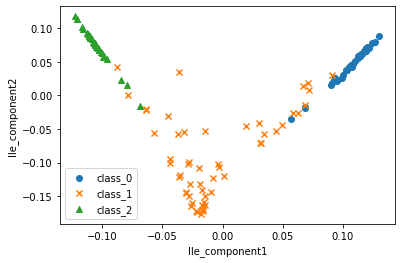

In [15]:
# LLE 적용 데이터 시각화
import matplotlib.pyplot as plt
df = X_tn_lle_df
markers=['o','x','^']

for i,mark in enumerate(markers):
    X_i = df[df['target']==i] # i 번째 클래스에 해당하는 데이터 추출
    target_i = raw_wine.target_names[i] # i 번째 타깃 클래스 이름 저장
    X1 = X_i['lle_comp1'] # lle 요소 설정
    X2 = X_i['lle_comp2'] # lle 요소 설정
    plt.scatter(X1, X2, marker=mark, label=target_i) # scatter plot으로 시각화

plt.xlabel('lle_component1')
plt.ylabel('lle_component2')
plt.legend()
plt.show()

In [16]:
# LLE 적용 후 랜덤 포레스트 학습 및 예측
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)

clf_rf.fit(X_tn_lle, y_tn)
pred_rf_lle = clf_rf.predict(X_te_lle)

In [17]:
# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy_lle = accuracy_score(y_te, pred_rf_lle)
print(accuracy_lle)

0.9333333333333333


## 비음수 행렬 분해(Non-negative Matrix Factorization, NMF)
- 데이터 행렬 내 모든 원소값이 0보다 큰 경우 사용할 수 있는 행렬 분해 방법

In [19]:
# 사람 얼굴의 특징 요소 추출하는 모형 생성
from sklearn import datasets
raw_face = datasets.fetch_lfw_people(min_faces_per_person=20, resize=0.5, color=False)
# 비음수 행렬에서 쓰이는 데이터는 성분이 모두 음수가 아닌 성분이어야 하므로 주로 얼굴 혹은 음성 데이터 사용


HTTPError: HTTP Error 403: Forbidden

In [ ]:
# 데이터 살펴보기

# raw_face.images 얼굴을 행렬 형태로 나타낸 데이터 의미. 얼굴 하나가 하나의 사각행렬
n_samples, h, w = raw_face.images.shape
print(n_samples) # 얼굴 개수 3023개
print(h) # 얼굴 데이터 하나의 세로 길이 = 62
print(w) # 가로 길이 = 47

# raw_face.data는 각 얼굴 데이터를 하나의 벡터로 표현한 것
X = raw_face.data
n, p = X.shape # X의 차원: 3023 * 2914
print(n) # 얼굴 3023 개 (=행 수)
print(p) # 기존의 h*w 행렬 일렬로 늘어놓아 2914개 열

# 타깃 데이터 저장
y = raw_faace.target
target_names = raw_face.target_names # 얼굴 데이터 이름
k = target_names.shape[0] # 타깃 데이터 클래스 개수
print(k) # 얼굴 종류는 총 62개

In [ ]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1)

In [ ]:
# 비음수 행렬 분해
from sklearn.decomposition import NMF
nmf = NMF(n_components=10, random_state=0) # 2914차원의 데이터 10차원으로 줄이기
nmf.fit(X_tn)
X_tn_nmf = nmf.transform(X_tn)
X_te_nmf = nmf.transform(X_te)

In [ ]:
# 오리지널 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.gray()
for i in range(2*5): # 10개만 그려봄
    plt.subplot(2, 5, i+1) # 2행 5열의 형태로
    plt.imshow(X_tn[i].reshape((h,w))) # imshow 통해 그리고 reshape 통해 그림 크기 조정
    plt.title(target_names[y_tn[i]]) # 각 얼굴 데이터의 제목 붙힘
plt.show()

In [ ]:
# 비음수 행렬 분해 요소 시각화
plt.figure(figsize=(15,8))
plt.gray()
for i in range(2*5): # 10차원 벡터이므로 10개의 그림
    plt.subplot(2, 5, i+1) # 2행 5열로 표현
    plt.imshow(nmf.components_[i].reshape((h,w)))
    plt.title("component ".format(i))
plt.show()